<a href="https://colab.research.google.com/github/rency1192/CampusRecruitment/blob/master/Campus_Recruitment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Basic imports

import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
import tensorflow as tf
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/ML/Dataset/Placement_Data_Full_Class.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [ ]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


Text(0.5, 1.0, 'Distribution of Males and Females in our Data')

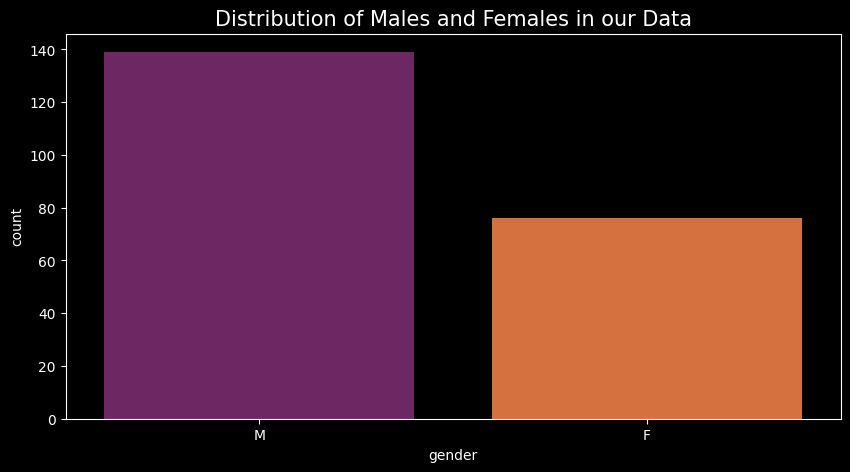

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize=(10,5))
sns.countplot(x='gender',data = df,palette = 'inferno')
plt.title("Distribution of Males and Females in our Data",fontsize = 15)

Text(0.5, 1.0, 'Distribution of the Boards the Students belong to in 10th')

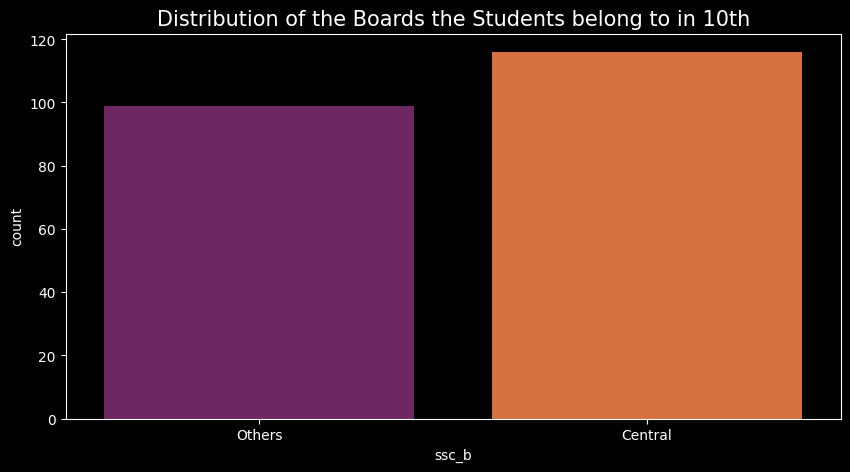

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='ssc_b',data = df,palette = 'inferno')
plt.title("Distribution of the Boards the Students belong to in 10th",fontsize = 15)

Text(0.5, 1.0, 'Distribution of the Boards the Students belong to in 10th')

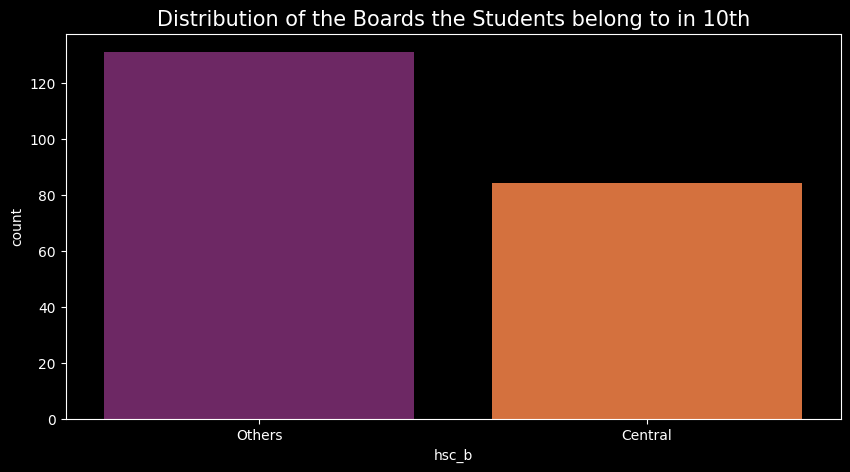

In [ ]:

plt.figure(figsize=(10,5))
sns.countplot(x='hsc_b',data = df,palette = 'inferno')
plt.title("Distribution of the Boards the Students belong to in 10th",fontsize = 15)

Text(0.5, 1.0, 'Distribution of the Streams that students chose in High school')

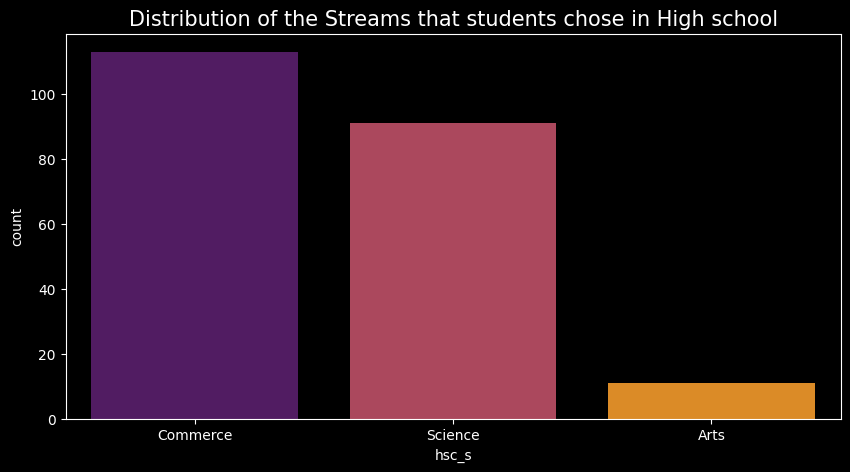

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='hsc_s',data = df,palette = 'inferno')
plt.title("Distribution of the Streams that students chose in High school",fontsize = 15)

Text(0.5, 1.0, 'Distribution of the Type of Degrees')

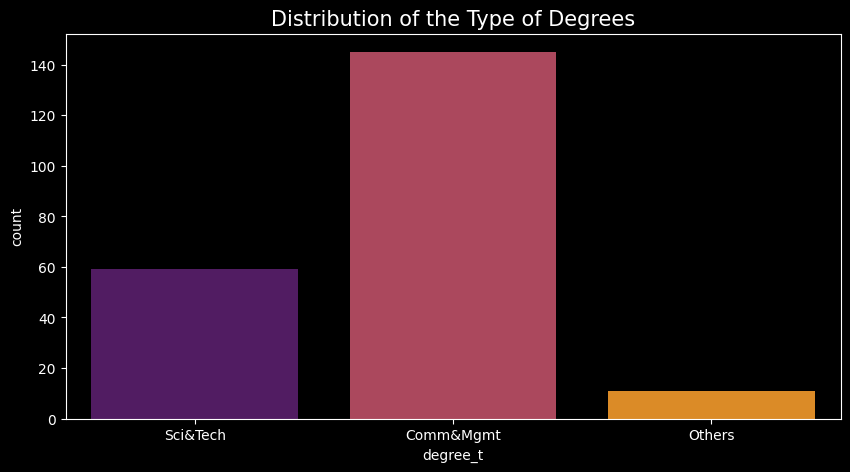

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='degree_t',data = df,palette = 'inferno')
plt.title("Distribution of the Type of Degrees",fontsize = 15)

Text(0.5, 1.0, 'Distribution of how many students have prior work experience')

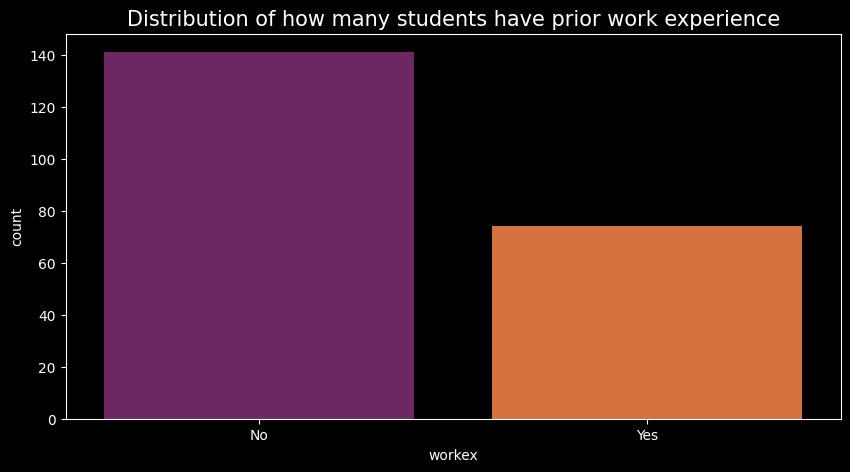

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='workex',data = df,palette = 'inferno')
plt.title("Distribution of how many students have prior work experience",fontsize = 15)

Text(0.5, 1.0, 'Distribution of the Types of Specialisation')

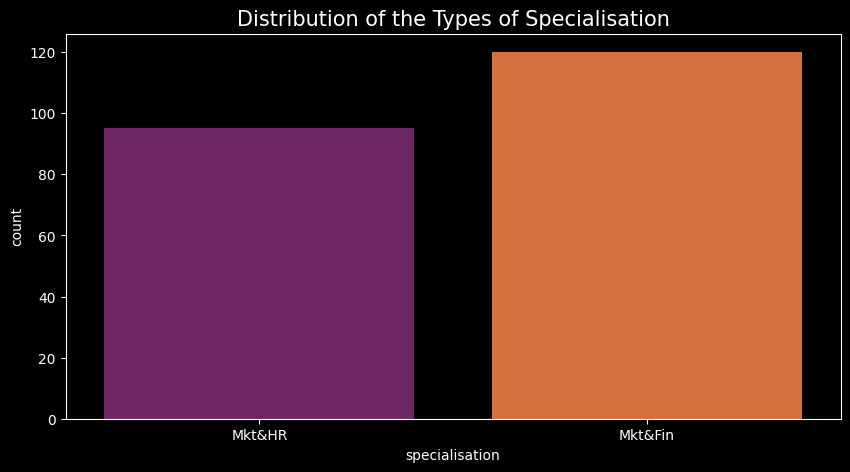

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='specialisation',data = df,palette = 'inferno')
plt.title("Distribution of the Types of Specialisation",fontsize = 15)


Text(0.5, 1.0, 'Distribution of the Placements')

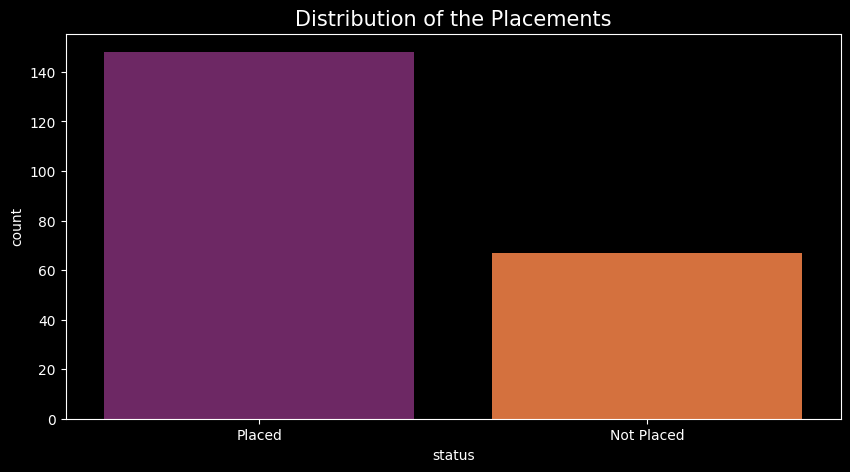

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='status',data = df,palette = 'inferno')
plt.title("Distribution of the Placements",fontsize = 15)

Text(0.5, 1.0, 'Distribution of Placements in Males and Females')

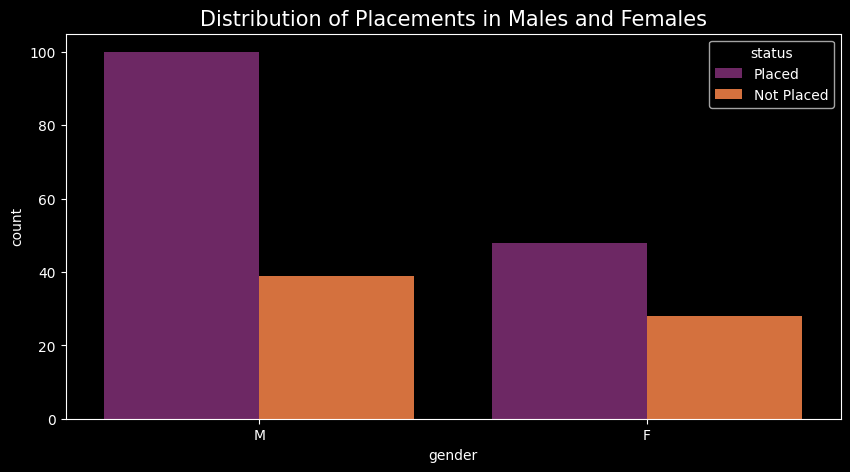

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='gender',data = df,palette = 'inferno',hue = 'status')
plt.title("Distribution of Placements in Males and Females",fontsize = 15)

Text(0.5, 1.0, 'Distribution of Placements in Males and Females')

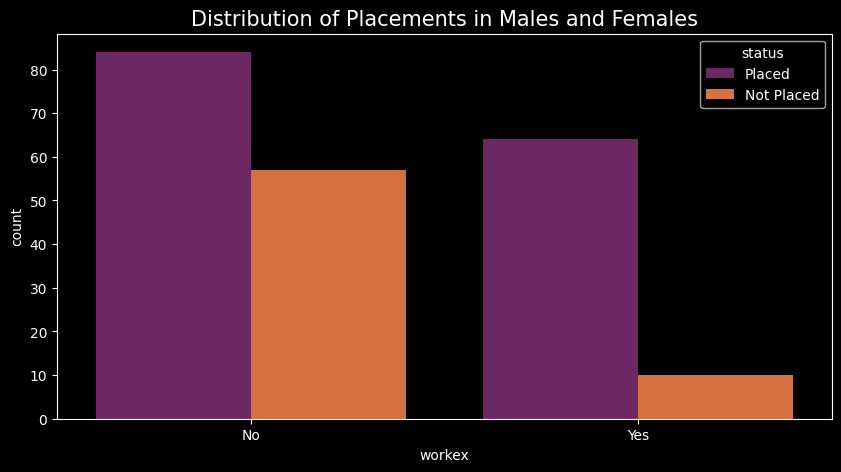

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='workex',data = df,palette = 'inferno',hue = 'status')
plt.title("Distribution of Placements in Males and Females",fontsize = 15)

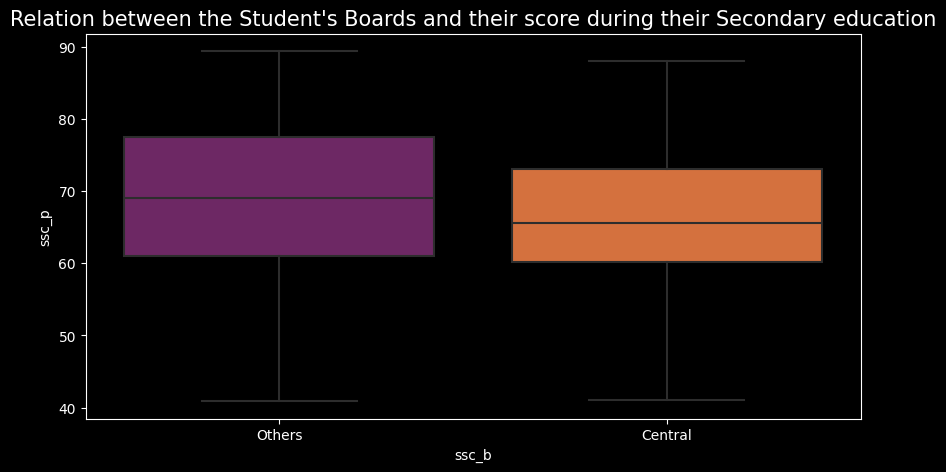

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='ssc_b', y='ssc_p', data=df, palette='inferno')
plt.title("Relation between the Student's Boards and their score during their Secondary education", fontsize=15)
plt.show()

Text(0.5, 1.0, 'Relation between the Students that were placed and their score during their Secondary education')

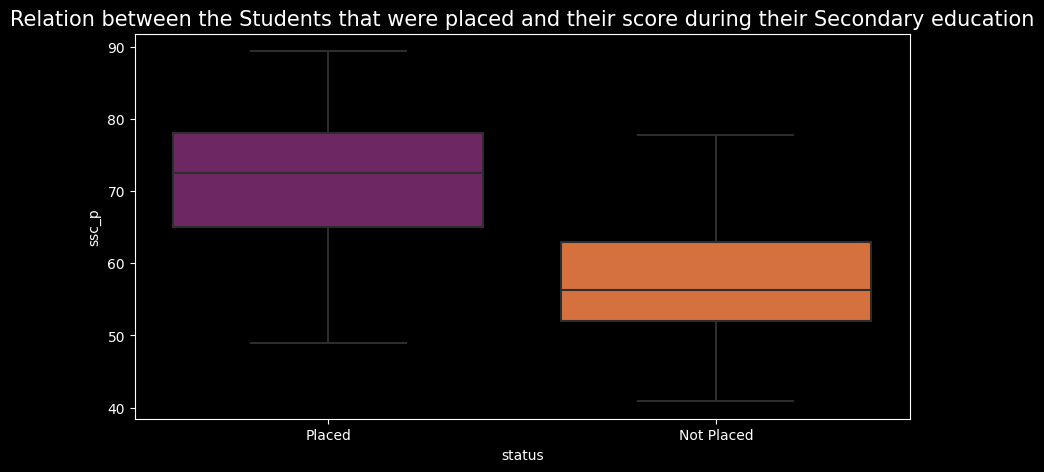

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='status',y='ssc_p',data = df,palette = 'inferno')
plt.title("Relation between the Students that were placed and their score during their Secondary education",fontsize = 15)

Text(0.5, 1.0, "Relation between the Student's Boards and their score in High school")

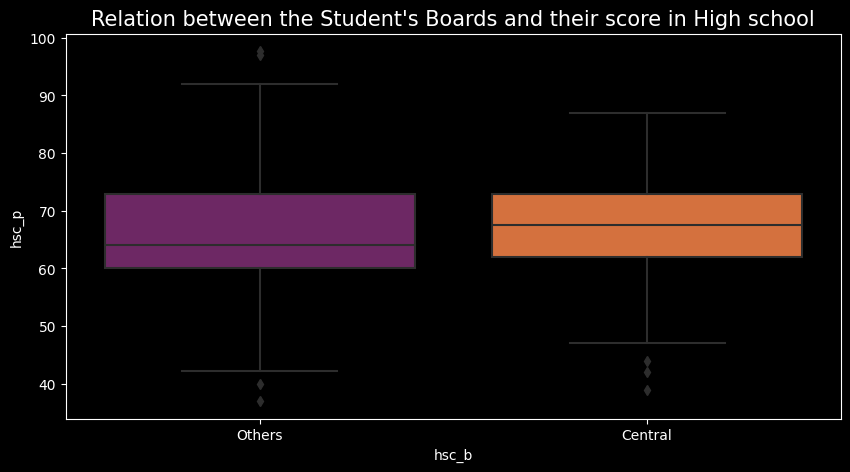

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='hsc_b',y='hsc_p',data = df,palette = 'inferno')
plt.title("Relation between the Student's Boards and their score in High school",fontsize = 15)

Text(0.5, 1.0, 'Relation between the Students that were placed and their score in High school')

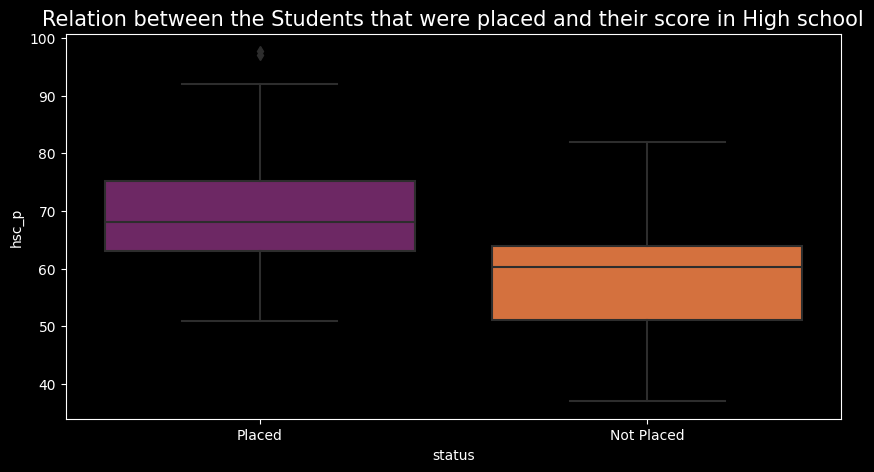

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='status',y='hsc_p',data = df,palette = 'inferno')
plt.title("Relation between the Students that were placed and their score in High school",fontsize = 15)

Text(0.5, 1.0, 'Relation between the Students that were placed and their score during MBA')

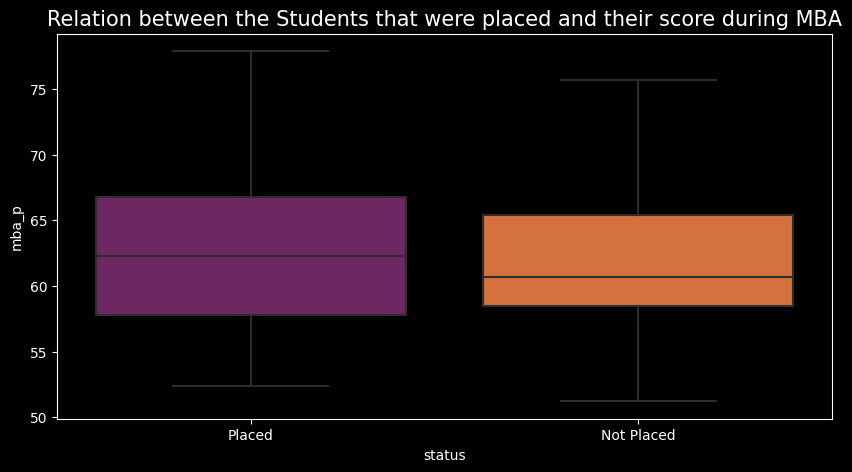

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='status',y='mba_p',data = df,palette = 'inferno')
plt.title("Relation between the Students that were placed and their score during MBA",fontsize = 15)

Text(0.5, 1.0, 'Relation between the Students that were placed and the boards that they were in during Secondary Education')

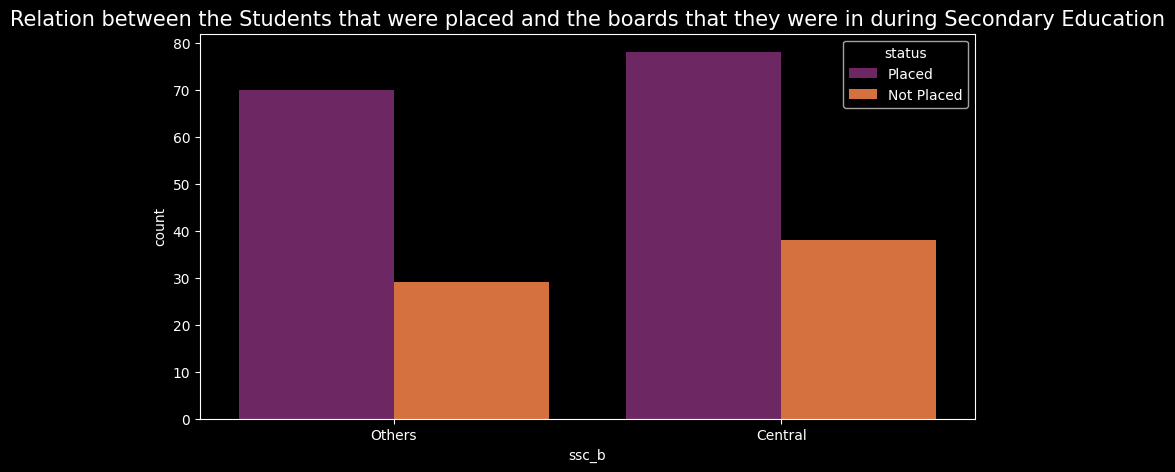

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='ssc_b',data = df,palette = 'inferno',hue = 'status')
plt.title("Relation between the Students that were placed and the boards that they were in during Secondary Education",fontsize = 15)


Text(0.5, 1.0, 'Relation between the Students that were placed and the boards that they were in High School')

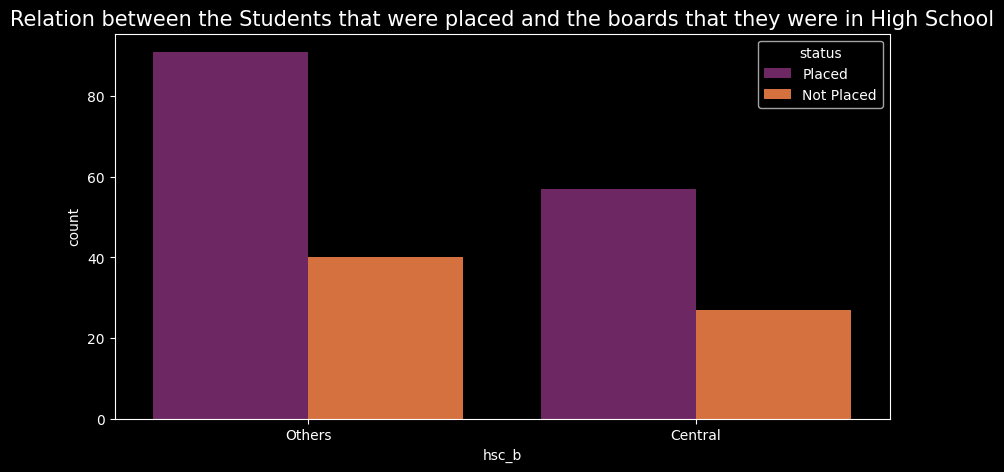

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='hsc_b',data = df,palette = 'inferno',hue = 'status')
plt.title("Relation between the Students that were placed and the boards that they were in High School",fontsize = 15)

Text(0.5, 1.0, 'Relation between the Students that were placed and their degree percentage')

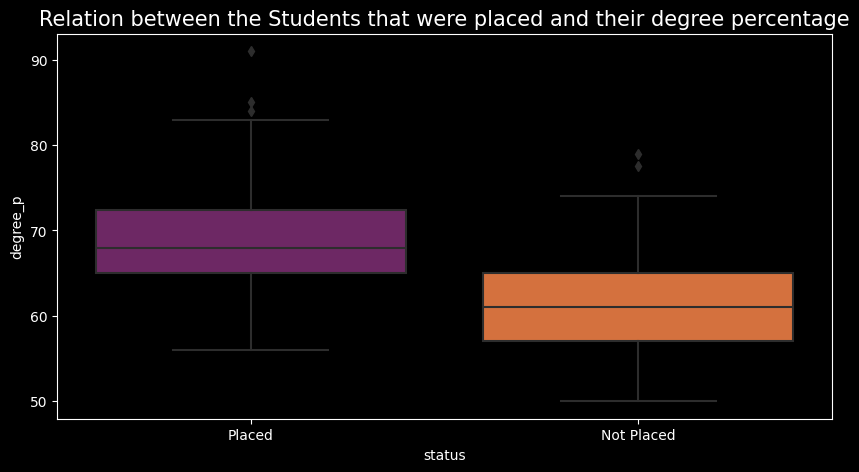

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='status',y='degree_p',data = df,palette = 'inferno')
plt.title("Relation between the Students that were placed and their degree percentage",fontsize = 15)

Text(0.5, 1.0, 'Relation between the streams that students chose in highschool and their placement')

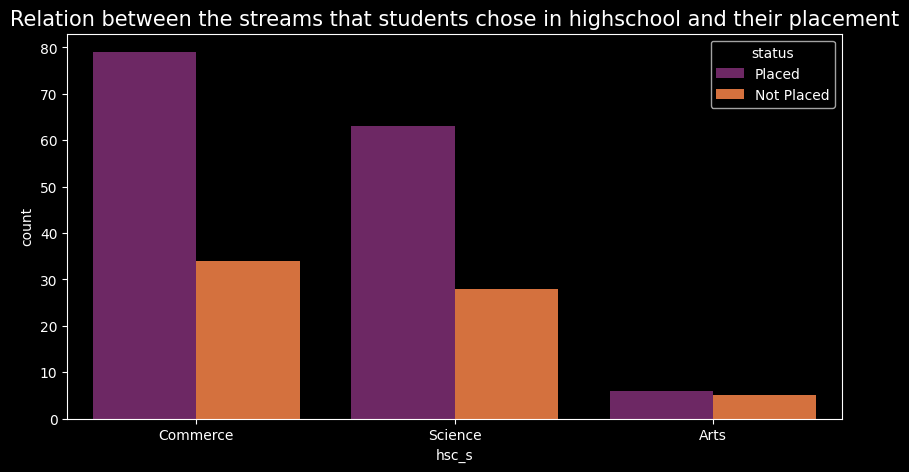

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='hsc_s',data = df,palette = 'inferno',hue = 'status')
plt.title("Relation between the streams that students chose in highschool and their placement",fontsize = 15)

Text(0.5, 1.0, 'Relation between the degree types that students chose and their placement')

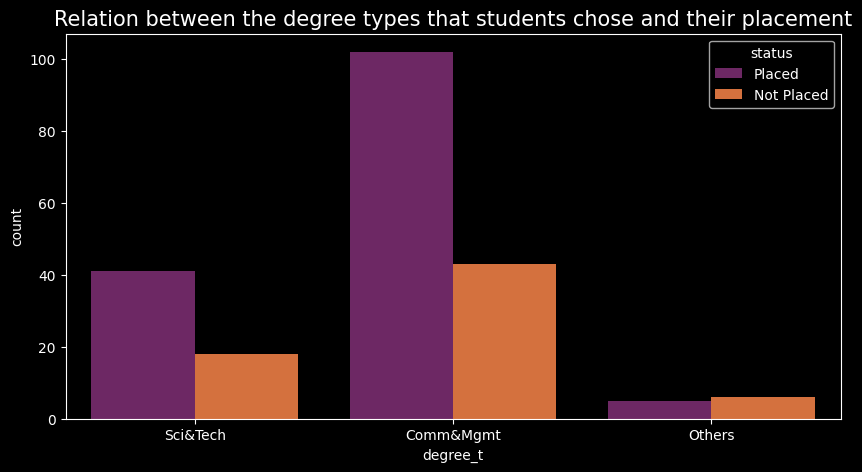

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='degree_t',data = df,palette = 'inferno',hue = 'status')
plt.title("Relation between the degree types that students chose and their placement",fontsize = 15)

In [ ]:
df = df

In [ ]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
df['status']= df['status'].map({'Placed':1,'Not Placed':0})
df['workex']= df['workex'].map({'Yes':1,'No':0})
df['gender']= df['gender'].map({'M':1,'F':0})
df['hsc_b']= df['hsc_b'].map({'Central':1,'Others':0})
df['ssc_b']= df['ssc_b'].map({'Central':1,'Others':0})
df['degree_t']= df['degree_t'].map({'Sci&Tech':0,'Comm&Mgmt':1,'Others':2})
df['specialisation']= df['specialisation'].map({'Mkt&HR':1,'Mkt&Fin':0})
df['hsc_s']= df['hsc_s'].map({'Commerce':0,'Science':1,'Arts':2})

In [ ]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,0,91.00,0,0,58.00,0,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,1,78.33,0,1,77.48,0,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,1,68.00,1,2,64.00,1,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,1,52.00,1,1,52.00,0,0,66.0,1,59.43,0,NaN
4,5,1,85.80,1,73.60,1,0,73.30,1,0,96.8,0,55.50,1,425000.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score,recall_score,precision_score

In [ ]:
X = df[['ssc_p','hsc_p','degree_p','workex','mba_p','etest_p','gender','degree_t','specialisation']]
y = df['status']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 101)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

In [ ]:
print("Accuracy:",accuracy_score(y_test, pred)*100)
print("Precision:",precision_score(y_test, pred)*100)
print("Recall:",recall_score(y_test, pred)*100)

Accuracy: 88.37209302325581
Precision: 89.28571428571429
Recall: 92.5925925925926


In [ ]:
# Save the trained model
joblib.dump(lr, 'model.pkl')

['model.pkl']

In [ ]:
user_input1 = [[67.00,91.00,58.00,0,58.80,55.00,1,0,1]]
user_pred1 = lr.predict(user_input1)
if user_pred1 == 1:
    print("The Candidate will be Placed!")
else:
    print("The Candidate won't be Placed :(")

The Candidate will be Placed!


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)

In [ ]:
print("Accuracy:",accuracy_score(y_test, prediction)*100)
print("Precision:",precision_score(y_test, prediction)*100)
print("Recall:",recall_score(y_test, prediction)*100)

Accuracy: 74.4186046511628
Precision: 80.76923076923077
Recall: 77.77777777777779


In [ ]:
user_input2 = [[67.00,91.00,58.00,0,58.80,55.00,1,0,1]]
user_pred2 = knn.predict(user_input2)
if user_pred1 == 1:
    print("The Candidate will be Placed!")
else:
    print("The Candidate won't be Placed :(")

The Candidate will be Placed!


Optimizing KNN

In [ ]:
error = []
for i in  range(1,100):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error')

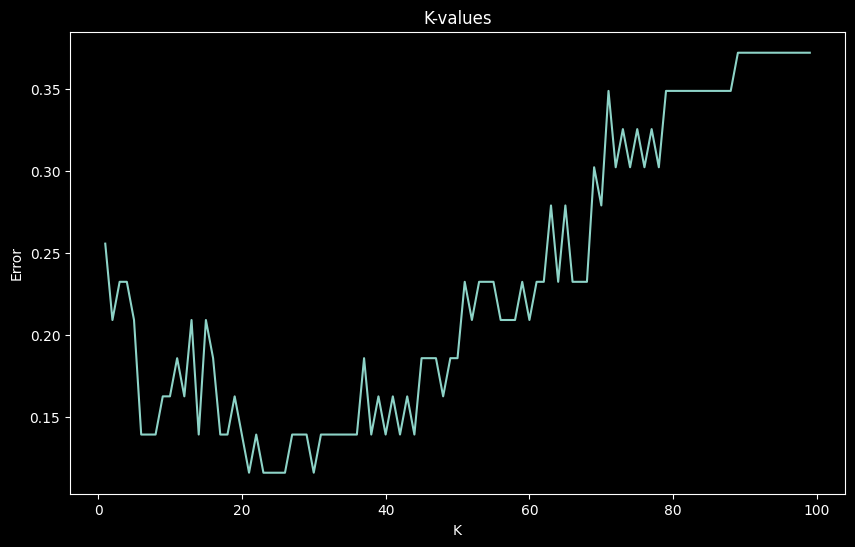

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(range(1,100),error)
plt.title('K-values')
plt.xlabel('K')
plt.ylabel('Error')

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors=20)
knn1.fit(X_train,y_train)
prediction1 = knn1.predict(X_test)

In [ ]:
print("Accuracy:",accuracy_score(y_test, prediction1)*100)
print("Precision:",precision_score(y_test, prediction1)*100)
print("Recall:",recall_score(y_test, prediction1)*100)

Accuracy: 86.04651162790698
Precision: 83.87096774193549
Recall: 96.29629629629629


In [ ]:
user_input3 = [[67.00,91.00,58.00,0,58.80,55.00,1,0,1]]
user_pred3 = knn1.predict(user_input1)
if user_pred3 == 1:
    print("The Candidate will be Placed!")
else:
    print("The Candidate won't be Placed :(")

The Candidate will be Placed!


SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)

In [ ]:
print("Accuracy:",accuracy_score(y_test, svc_pred)*100)
print("Precision:",precision_score(y_test, svc_pred)*100)
print("Recall:",recall_score(y_test, svc_pred)*100)

Accuracy: 79.06976744186046
Precision: 82.14285714285714
Recall: 85.18518518518519


Optimizing SVM with Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [ ]:
grid = GridSearchCV(SVC(),param_grid,verbose = 3)

In [ ]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.714 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.686 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.706 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.706 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.706 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.714 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.686 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.706 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.706 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.706 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.714 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [ ]:
grid.best_estimator_

SVC(C=100, gamma=0.001)

In [ ]:
grid.best_params_

{'C': 100, 'gamma': 0.001}

In [ ]:
grid_pred = grid.predict(X_test)

In [ ]:
print("Accuracy:",accuracy_score(y_test, grid_pred)*100)
print("Precision:",precision_score(y_test, grid_pred)*100)
print("Recall:",recall_score(y_test, grid_pred)*100)

Accuracy: 83.72093023255815
Precision: 85.71428571428571
Recall: 88.88888888888889


In [ ]:
user_input4 = [[56.00,52.00,52.00,0,59.43,66.00,1,0,1]]
user_pred4 = grid.predict(user_input4)
if user_pred4 == 1:
    print("The Candidate will be Placed!")
else:
    print("The Candidate won't be Placed :(")

The Candidate won't be Placed :(


In [ ]:
import pickle

In [ ]:
pickle.dump(lr,open('Logistic_model.pkl','wb'))
pickle.dump(knn1,open('KNN_model.pkl','wb'))
pickle.dump(grid_pred,open('SVM_model.pkl','wb'))